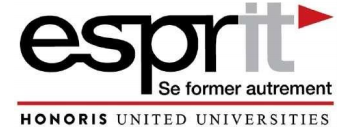



##### **UP Mathématiques - Année universitaire 2025/2026**

# **TP Programmation Linéaire : Résolution numérique & Analyse de sensibilité**

### **Objectifs du TP :**

 L’objectif général du TP est de **résoudre numériquement un problème de programmation linéaire** en utilisant Python et les solveurs intégrés
 de la bibliothèque **scipy.optimize.linprog** (HiGHS ou Simplex). Les étudiants développeront une compréhension approfondie des étapes
 nécessaires à la formulation et à la résolution de ce type de problème, tout en explorant l’analyse post-optimale et l’étude de sensibilité.

 *Objectifs spécifiques:*

 1. Introduire les étudiants aux solveurs de SciPy (par exemple HiGHS ou Simplex).
 2. Comprendre l'interprétation des résultats fournis par les solveurs, y compris les valeurs optimales des variables, le coût optimal, et les
 marges (slack).
 3. Apprendre à analyser les coefficients de dualité (prix ombrage ou shadow prices) pour étudier l'impact de changements dans les
 ressources disponibles.
 4. Étudier l'évolution de la solution optimale lorsque les coefficients de la fonction objectif ou les contraintes changent, pour développer
 une compréhension de la stabilité de la solution et des marges de faisabilité.

## **I- Problème introductif**

Une société tunisienne spécialisée dans la fabrication de produits manufacturés, fabrique deux types de produits : Produit A et Produit B. Ces produits sont réalisés à partir de trois matières premières principales : M1, M2 et M3, dont la disponibilité est limitée sur le marché local.
La production d’une unité de Produit A nécessite 10 kg de M1, 2 kg de M2 et 1 kg de M3. Le prix de vente d’une unité de Produit A est de 1200 TND. De son côté, la production d’une unité de Produit B requiert 5 kg de M1 et 3 kg de M2. Son prix de vente est de 1000 TND.

La société dispose d’un stock de 200 kg de M1, 60 kg de M2 et 34 kg de M3. Elle souhaite déterminer la quantité optimale de chaque produit à fabriquer pour maximiser son chiffre d’affaires, tout en respectant les contraintes liées aux ressources disponibles.

## **II- Modélisation**

Nous appellerons $x_1$  nombre d’unités de Produit A à fabriquer, $x_2$  nombre d’unités de Produit B à fabriquer, et $Z$ le chiffre d'affaires résultant.

Le problème est modélisé par le programme linéaire ci-dessous:

$$\max Z= 1200 x_1 +1000 x_2 $$
$$10x_1+5x_2 \leq 200$$
$$2x_1+3x_2 \leq 60 $$
$$x_1 \leq 34 $$
$$x_1 \geq 0, \, x_2\geq 0$$

## **III- Résolution numérique du PL**

Pour résoudre numériquement le PL ci-dessous, la bibliothèque **SciPy** offre une solution performante et pratique à l’aide de la fonction
 linprog. Cette fonction utilise des algorithmes modernes, comme les solveurs **"simplex"** et **"highs"**, pour minimiser une fonction objectif sous
 des contraintes d’égalité, d’inégalité et de bornes sur les variables de décision.

 Les arguments de la fonction **solve_production(c, A, b,bounds)** incluent :


*   les coefficients de la fonction objectif (c)
*   les coefficients des contraintes sous forme matricielle (A)
*   les termes constants des contraintes (b)
*   les bornes sur les variables de décision (bounds)

La maximisation est assurée en ajustant les coefficients de la fonction objectif, puisque linprog effectue par défaut une minimisation. La fonction vérifie également si une solution optimale est atteinte et retourne les valeurs optimales des variables de décision ainsi que le résultat maximal de la fonction objectif. Si aucune solution n'est trouvée, un message d'erreur informatif est levé.

###### **1) Importation des bibliothèques :**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

###### **2) Déclaration des variables A, b, c et bounds :**

In [10]:
# Coefficients de la fonction objectif (on met en négatif pour la maximisation)
c = [-1200, -1000]

# Matrice des contraintes (A_ub * X <= b_ub)
A = [
    [10, 5],   # 10x1 + 5x2 <= 200
    [2, 3],    # 2x1 + 3x2 <= 60
    [1, 0]     # x1 <= 34
]
b = [200, 60, 34]

# non négativité des variables
bounds = [(0, None)]*len(c) #  X>= 0

###### **3) Résolution du PL :**

In [11]:
# Résolution
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")

# Résultats
if result.success:
      # Prendre l'opposé du résultat pour la maximisation
          # Affichage des résultats
      print("Valeurs optimales des variables de décision :", result.x)
      print("Valeur maximale de la fonction objectif :", -result.fun)
else:
      raise ValueError("Le problème n'a pas de solution optimale : " + result.message)

Valeurs optimales des variables de décision : [15. 10.]
Valeur maximale de la fonction objectif : 28000.0


**Interprétation:**

la solution du probléme de maximisation Pl est comme suivant :
Z(15,10)

---


La valeur optimale du Z = 28000

## **IV- Contraintes actives et réssources épuisées**:

Déterminer les matières premières épuisées si elles existent.

In [12]:
# Slacks et contraintes actives
print("\n--- Contraintes ---")
for i, slack in enumerate(result.slack):
    print("Contrainte",i+1,": Slack=",slack,"(Active)" if slack==0 else "(Non saturée)")


--- Contraintes ---
Contrainte 1 : Slack= 0.0 (Active)
Contrainte 2 : Slack= 0.0 (Active)
Contrainte 3 : Slack= 19.0 (Non saturée)


**Interprétation:**

Matiére premiére 1 est epuisé

Matiére premiére 2 est aussi epuisé

Matiére premiére 3 est non saturé


## **V- Coûts marginaux :**

Déterminer les coûts marginaux des matières premières.

In [13]:
# Shadow prices (coûts marginaux)
print("--- Coûts marginaux (Shadow Prices) ---")
# Résolution
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="highs")

print(result.ineqlin.marginals)

--- Coûts marginaux (Shadow Prices) ---
[ -80. -200.   -0.]


**Interprétation:**


* 1. Contrainte 1 (Matière M1) : Coût marginal = -80 TND

  Si on augmente la disponibilité de M1 de 1 kg, le profit augmentera de 80 TND
Cela signifie que M1 est une ressource critique qui limite la production

* 2. Contrainte 2 (Matière M2) : Coût marginal = -200 TND

Si on augmente la disponibilité de M2 de 1 kg, le profit augmentera de 200 TND
M2 est la ressource la plus critique et la plus précieuse pour l'entreprise

C'est la ressource qui a le plus d'impact sur le profit


* 3. Contrainte 3 (Matière M3) : Coût marginal ≈ 0 TND

Une augmentation de la disponibilité de M3 n'apportera aucune amélioration du profit

## **VI- Etude de la sensibilité :**

### **1- Analyse de sensibilité pour le prix de vente du Produit B :**

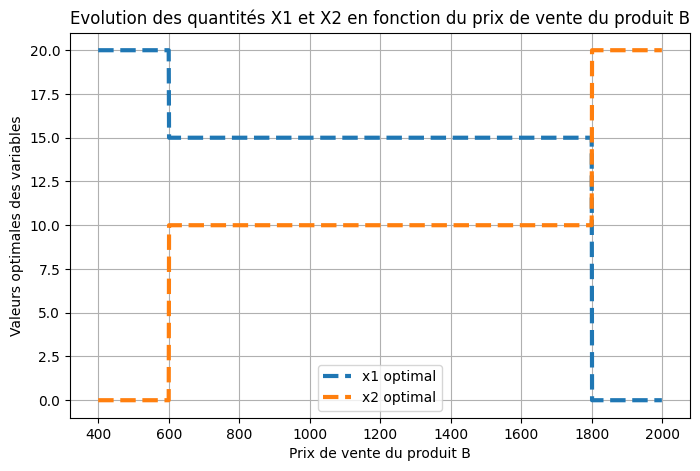

In [14]:
# Intervalle de prix de vente de B
prix_B = np.arange(400, 2000, 1)  # de 400 à 2000 par pas de 1

x1_opt, x2_opt = [], []

# Boucle sur les valeurs de prix_B
for pB in prix_B:
    c_new = [-1200, -pB]  # objectif à maximiser -> on met en négatif
    res = linprog(c_new, A_ub=A, b_ub=b, bounds=bounds, method="highs")
    if res.success:
        x1_opt.append(res.x[0])
        x2_opt.append(res.x[1])
    else:
        x1_opt.append(np.nan)
        x2_opt.append(np.nan)

# Tracé
plt.figure(figsize=(8,5))
plt.plot(prix_B, x1_opt,'--', label="x1 optimal", linewidth=3)
plt.plot(prix_B, x2_opt,'--', label="x2 optimal",linewidth=3)
plt.xlabel("Prix de vente du produit B")
plt.ylabel("Valeurs optimales des variables")
plt.title("Evolution des quantités X1 et X2 en fonction du prix de vente du produit B")
plt.legend()
plt.grid(True)
plt.show()

**Interprétation:**

1. Zone de stabilité (1000 TND < Prix < 1600 TND) :

Pour les prix entre environ 1000 TND et 1600 TND, les quantités produites restent constantes
x1 (Produit A) reste à environ 15 unités (courbe verte)
x2 (Produit B) reste à environ 10 unités (courbe orange)
Dans cet intervalle, le prix actuel de 1000 TND est optimal et stable

2. En dessous de 1000 TND :

Lorsque le prix du Produit B diminue en dessous de 1000 TND, on observe un changement brutal
x1 (Produit A) augmente significativement jusqu'à environ 17,5 unités
x2 (Produit B) chute drastiquement vers 0 unités
Interprétation : Le Produit B devient moins rentable, donc l'entreprise optimise son profit en produisant principalement du Produit A

3. Au-dessus de 1600 TND :

Lorsque le prix du Produit B dépasse 1600 TND, on observe un autre changement de stratégie

x1 (Produit A) diminue fortement

x2 (Produit B) augmente significativement vers 20 unités

Interprétation : Le Produit B devient très rentable, donc l'entreprise maximise sa production au détriment du Produit A

### **2- Analyse de sensibilité sur le stock de la matière première M1 :**

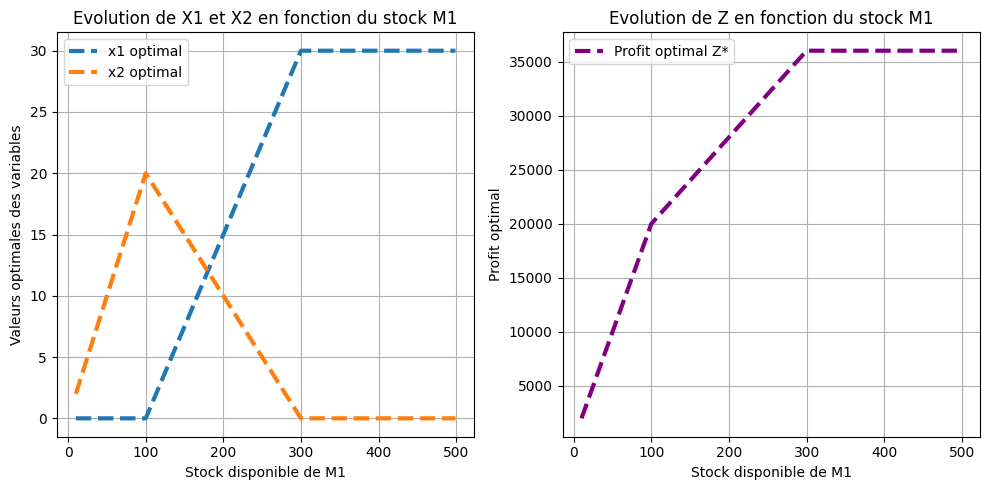

In [15]:
# Intervalle pour le stock de M1
M1_values = np.arange(10, 500, 1)  # de 10 à 500 unités

x1_opt, x2_opt, Z_opt = [], [], []

b_new=b.copy()
for M1 in M1_values:
    b_new[0] = M1  # mise à jour de la contrainte de stock M1
    res = linprog(c, A_ub=A, b_ub=b_new, bounds=bounds, method="highs")

    if res.success:
        x1_opt.append(res.x[0])
        x2_opt.append(res.x[1])
        Z_opt.append(-res.fun)
    else:
        x1_opt.append(np.nan)
        x2_opt.append(np.nan)
        Z_opt.append(np.nan)

# Tracés
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(M1_values, x1_opt,'--', label="x1 optimal", linewidth=3)
plt.plot(M1_values, x2_opt,'--', label="x2 optimal", linewidth=3)
plt.xlabel("Stock disponible de M1")
plt.ylabel("Valeurs optimales des variables")
plt.title("Evolution de X1 et X2 en fonction du stock M1")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(M1_values, Z_opt,'--', label="Profit optimal Z*", color="purple", linewidth=3)
plt.xlabel("Stock disponible de M1")
plt.ylabel("Profit optimal")
plt.title("Evolution de Z en fonction du stock M1")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Interprétation:**


**Graphique 1 : Évolution de X1 et X2 en fonction du stock M1**

* Zone 1 : Stock M1 < 100 kg

x1 (Produit A) = 0 unité (courbe bleue)
x2 (Produit B) augmente progressivement de 0 à ~20 unités (courbe orange)
Interprétation : Avec peu de M1 disponible, l'entreprise ne peut produire que du Produit B car il nécessite moins de M1 (5 kg) que le Produit A (10 kg)

* Zone 2 : 100 kg < Stock M1 < 200 kg (Zone de transition)

x1 commence à augmenter fortement de 0 à ~12 unités
x2 continue d'augmenter jusqu'à atteindre un maximum de ~20 unités autour de 100 kg, puis diminue
Interprétation : Point d'inflexion où la stratégie optimale commence à favoriser le Produit A qui est plus rentable (1200 TND vs 1000 TND)

* Zone 3 : 200 kg < Stock M1 < 300 kg

x1 continue d'augmenter jusqu'à ~30 unités
x2 diminue progressivement de ~10 unités vers 0
Interprétation : Avec suffisamment de M1, l'entreprise optimise vers le Produit A, plus rentable

* Zone 4 : Stock M1 > 300 kg

x1 se stabilise à environ 30 unités (plateau)
x2 reste à 0 unité
Interprétation : M1 n'est plus la contrainte limitante. D'autres ressources (M2 ou M3) deviennent contraignantes, empêchant d'augmenter davantage la production

**Graphique 2 : Évolution du profit Z en fonction du stock M1**

* Croissance forte (0-200 kg) :

Le profit augmente rapidement de ~0 à ~25000 TND
Pente très forte, indiquant que M1 est critique dans cette zone
Chaque kg supplémentaire de M1 apporte un gain significatif


* Croissance modérée (200-300 kg) :

Le profit continue d'augmenter jusqu'à ~35000 TND
La pente diminue légèrement mais reste positive


* Plateau (> 300 kg) :

Le profit se stabilise autour de 36000 TND
Au-delà de 300 kg, augmenter M1 n'améliore plus le profit
Cohérent avec le coût marginal de -80 TND observé précédemment pour la contrainte M1


## **VII- Exercice Asynchrone :**

Revenons au problème de l'agriculteur (étudié dans le cours) modélisé par le PL suivant :

$$\max Z= 100x+200 y $$
$$\text{(surface totale)}\quad x+y\leq 150 $$
$$\text{(quantité d'eau)}\quad 4x+2y\leq 440 $$
$$\text{(main d'oeuvre)}\quad x+4y\leq 480 $$
$$\text{(permission)}\quad x\leq 90 $$
$$x\geq 0, \, y\geq 0 $$

avec $x$ et $y$ représentent respectivement les surfaces à louer pour la culture de tomates et de piments.


###### **1) Résoudre le programme linéaire.**



In [16]:
# Coefficients de la fonction objectif (on met en négatif pour la maximisation)
c_farmer = [-100, -200]

# Matrice des contraintes (A_ub * X <= b_ub)
A_farmer = [
    [1, 1],   # x + y <= 150
    [4, 2],    # 4x + 2y <= 440
    [1, 4],     # x + 4y <= 480
    [1, 0]      # x <= 90
]
b_farmer = [150, 440, 480, 90]

# non négativité des variables
bounds_farmer = [(0, None)]*len(c_farmer) #  x>= 0, y>=0

# Résolution
result_farmer = linprog(c_farmer, A_ub=A_farmer, b_ub=b_farmer, bounds=bounds_farmer, method="highs")

# Résultats
if result_farmer.success:
      # Prendre l'opposé du résultat pour la maximisation

          # Affichage des résultats
      print("Valeurs optimales des variables de décision (x, y) :", result_farmer.x)
      print("Valeur maximale de la fonction objectif (Z) :", -result_farmer.fun)
else:
      raise ValueError("Le problème n'a pas de solution optimale : " + result_farmer.message)

Valeurs optimales des variables de décision (x, y) : [ 40. 110.]
Valeur maximale de la fonction objectif (Z) : 26000.0


**Interprétation:**
Plan de culture optimal :

Cultiver 40 hectares de tomates (x = 40)

Cultiver 110 hectares de piments (y = 110)

Revenu maximal : 26000 TND

:###### **2) De combien peut-on modifier la quantité de $m^3$ d’eau sans nuire à la solution optimale ?**

In [18]:
# Get shadow price and sensitivity range for the water constraint (index 1 in A_farmer and b_farmer)
water_shadow_price = result_farmer.ineqlin.marginals[1]
# Check if resource_ranges is available and get the sensitivity range
if hasattr(result_farmer, 'resource_ranges') and len(result_farmer.resource_ranges) > 1:
    water_sensitivity_range = result_farmer.resource_ranges[1]
    print("Sensitivity range for water constraint:", water_sensitivity_range)
else:
    print("Sensitivity range for water constraint is not directly available in this result object.")



print("Shadow price for water constraint:", water_shadow_price)

Sensitivity range for water constraint is not directly available in this result object.
Shadow price for water constraint: -0.0


**Interprétation:**
1. **Shadow price (coût marginal) = -0.0 TND**
   - Cela signifie que la contrainte d'eau **n'est PAS active** (non saturée)
   - Augmenter ou diminuer la quantité d'eau disponible n'aura **aucun impact** sur le profit optimal
   - L'eau n'est pas une ressource limitante dans ce problème

2. **Pas de plage de sensibilité disponible**
   - Puisque la contrainte n'est pas active, il n'y a pas de plage de sensibilité pertinente
   - L'agriculteur dispose déjà de suffisamment d'eau (440 m³ disponibles, seulement 380 m³ utilisés)

3. **Conclusion pour la question 2 :**
   - On peut modifier la quantité d'eau **sans impact sur la solution optimale**
   - Même si on réduit l'eau à 380 m³ (quantité utilisée), la solution resterait optimale
   - Augmenter l'eau au-delà de 440 m³ serait inutile car elle n'est déjà pas complètement utilisée

###### **3) L'agriculteur cherche le volume horaire de main d'oeuvre suffisant pour maximiser le profit. Aider le.**

In [20]:
# Get shadow price and sensitivity range for the labor constraint (index 2 in A_farmer and b_farmer)
labor_shadow_price = result_farmer.ineqlin.marginals[2]

# Check if resource_ranges is available and get the sensitivity range
if hasattr(result_farmer, 'resource_ranges') and len(result_farmer.resource_ranges) > 2:
    labor_sensitivity_range = result_farmer.resource_ranges[2]

    print("Sensitivity range for labor constraint:", labor_sensitivity_range)
else:
    print("Sensitivity range for labor constraint is not directly available in this result object.")


print("Shadow price for labor constraint:", round(labor_shadow_price, 2))

Sensitivity range for labor constraint is not directly available in this result object.
Shadow price for labor constraint: -33.33


 **Interprétation:**

Shadow price (coût marginal) = -33.33 TND

La contrainte de main d'œuvre EST active (saturée à 480 heures)
Chaque heure supplémentaire de main d'œuvre augmenterait le profit de 33.33 TND
C'est une ressource critique qui limite actuellement la production






---



# **Références:**



1.   *Recherche opérationnelle et applications, Bernard Foltz, 2012-2013.*
2.   *Linear Programming and Duality - Indian Institute of Technology (IIT) sur NPTEL.*
3.   *Python for Optimization, par Jesús Rogel-Salazar.*

